<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge S2 : Introducción a los Modelos de Previsión en Series Temporales

# 0. Objetivo

El objetivo de este challenge es realizar previsiones de series temporales, utilizando modelos sencillos para familiarizarnos con los principales conceptos de la modelización y previsión de variables

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe que incluya nuestro histórico y las fechas en las que queremos hacer la previsión.

No olvides que seguimos trabajando con series temporales, por lo que, tendremos una variable tiempo.

In [2]:
## Lectura de los datos
data_path = 'retail_sales.csv'
df_sales = pd.read_csv(data_path)

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    72 non-null     object
 1   sales   72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [4]:
df_sales.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


In [5]:
## Creamos un campo fecha
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%m-%d')


In [6]:
## Creamos un dataframe con el histórico

df_sales_prevision = pd.DataFrame(df_sales['sales'].tolist(),
                             index = df_sales['date'].tolist(),
                             columns = ['sales'])
df_sales_prevision.head()

,sales
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


Recordemos que vamos a realizar la predicción sobre el siguiente año.

In [7]:
## Periodos en los que vamos a hacer la predicción
periodos = pd.date_range(start='2015-10-01',periods = 12, freq = 'MS')
periodos

DatetimeIndex(['2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [8]:
## Creamos un dataframe con nuestras fechas a predecir

df_prediccion = pd.DataFrame({'sales':''},
                             index = periodos)
df_prediccion['sales']=np.nan
df_prediccion

,sales
2015-10-01,NaN
2015-11-01,NaN
2015-12-01,NaN
2016-01-01,NaN
2016-02-01,NaN
2016-03-01,NaN
2016-04-01,NaN
2016-05-01,NaN
2016-06-01,NaN
2016-07-01,NaN


In [9]:
## Unimos el dataframe del histórico y el de la predicción
df_sales = pd.concat([df_sales_prevision, df_prediccion], ignore_index = False)
df_sales.tail(20)

,sales
2015-02-01,386935.0
2015-03-01,444110.0
2015-04-01,438217.0
2015-05-01,462615.0
2015-06-01,448229.0
2015-07-01,457710.0
2015-08-01,456340.0
2015-09-01,430917.0
2015-10-01,NaN
2015-11-01,NaN


## 2. Componentes de la serie temporal

Representa la serie resultante.

<AxesSubplot:title={'center':'¿Cómo evolucionan las ventas? \n'}>

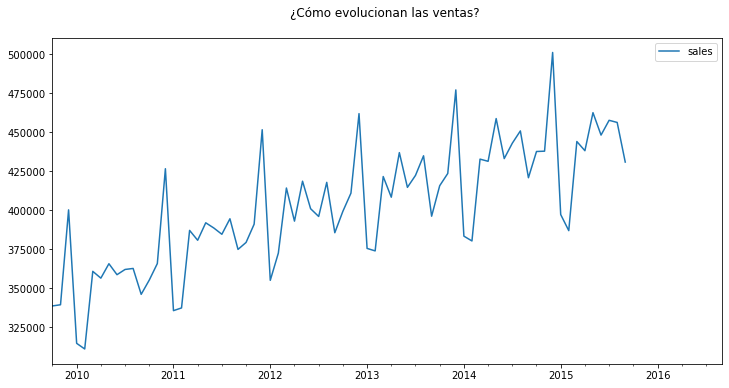

In [10]:
## Representamos la serie temporal
df_sales.plot(figsize=(12,6),
                  title='¿Cómo evolucionan las ventas? \n')

##### *P: ¿Qué componentes de una serie temporal tiene las ventas en retail?*

* Se aprecian dos componentes:
    * Tendencia: Positiva incremental
    * Estacionalidad: Se refleja una estacionalidad en cada periodo anual, más o menos se repite la misma figura cada año.

## 4. Predicciones mejoradas sobre la serie temporal

Para realizar las predicciones vamos a eliminar primero las componentes de la serie temporal, de manera que calculemos nuestra previsión sobre el residuo.

### 4.1.-  Eliminar las componentes de la serie: estacionalidad y tendencia

#### a) Elimina la estacionalidad y representa los resultados.

##### *P: ¿Cómo podemos eliminar la estacionalidad? ¿Qué ventana móvil debemos usar? ¿Por qué?*

* La estacionalidad la elimnamos realizando una media con una ventana, en este caso como las mediciones son mensuales, establecemos una venta de 12, por tener nuestro periodo anual, 12 meses, que se corresponde a 12 mediciones.

In [11]:
## Eliminamos la estacionalidad de la serie
ventana = 12
df_sales['sales_mm_12'] = df_sales['sales'].rolling(ventana).mean()
df_sales.head(15)

,sales,sales_mm_12
2009-10-01,338630.0,NaN
2009-11-01,339386.0,NaN
2009-12-01,400264.0,NaN
2010-01-01,314640.0,NaN
2010-02-01,311022.0,NaN
2010-03-01,360819.0,NaN
2010-04-01,356460.0,NaN
2010-05-01,365713.0,NaN
2010-06-01,358675.0,NaN
2010-07-01,362027.0,NaN


<AxesSubplot:title={'center':'¿Cómo evolucionan las ventas con estacionalidad "vs" sin estacionalidad? \n'}>

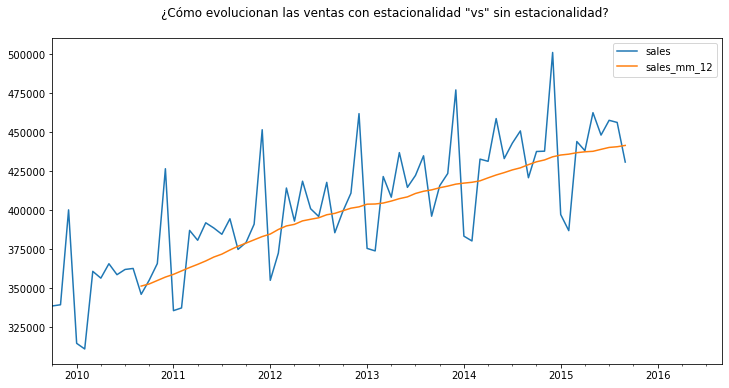

In [12]:
## Representamos el resultado
df_sales.plot(figsize=(12,6),
                  title='¿Cómo evolucionan las ventas con estacionalidad "vs" sin estacionalidad? \n')

#### b) Elimina la tendencia y representa los resultados.

##### *P: ¿Cómo podemos eliminar la tendencia?*

* La tendencia la eliminaremos restando el valor del anterior dato. Nos serviremos de la instrucción shift, con una ventana de 1

In [13]:
## Eliminamos la tendencia
df_sales['sales_mm_12_st'] = df_sales['sales_mm_12'] - df_sales['sales_mm_12'].shift(1)
df_sales.head(20)

,sales,sales_mm_12,sales_mm_12_st
2009-10-01,338630.0,NaN,NaN
2009-11-01,339386.0,NaN,NaN
2009-12-01,400264.0,NaN,NaN
2010-01-01,314640.0,NaN,NaN
2010-02-01,311022.0,NaN,NaN
2010-03-01,360819.0,NaN,NaN
2010-04-01,356460.0,NaN,NaN
2010-05-01,365713.0,NaN,NaN
2010-06-01,358675.0,NaN,NaN
2010-07-01,362027.0,NaN,NaN


array([<AxesSubplot:title={'center':'¿Cómo evoluciona las ventas?'}>,
       <AxesSubplot:title={'center':'Serie sin estacionalidad'}>,
       <AxesSubplot:title={'center':'Sin estacionalidad y sin tendencia'}>],
      dtype=object)

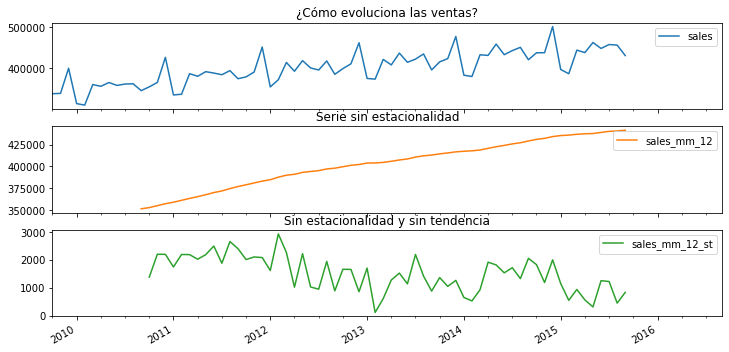

In [14]:
## Representamos el resultado
df_sales.loc[:,['sales','sales_mm_12','sales_mm_12_st']].plot(figsize=(12,6),
                                                         subplots=True,
                                                         title= ['¿Cómo evoluciona las ventas?',
                                                                'Serie sin estacionalidad',
                                                                'Sin estacionalidad y sin tendencia'])

### 4.2.-  Realizar la previsión

Realiza la previsión sobre la componente aleatoria. Utiliza alguno de los modelos que hemos visto y representa los resultados.

In [15]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_sales['sales_prevision_M12'] = np.nan
## Incluimos como previsión de los dos últimos meses la media de todos los alquileres
df_sales['sales_prevision_M12'][-13:] = df_sales['sales_mm_12_st'][-13]
df_sales['sales_prevision_M12'][-12:] = df_sales['sales_mm_12_st'].mean()
df_sales.tail(15)

,sales,sales_mm_12,sales_mm_12_st,sales_prevision_M12
2015-07-01,457710.0,440308.000000,1225.416667,NaN
2015-08-01,456340.0,440760.250000,452.250000,NaN
2015-09-01,430917.0,441597.416667,837.166667,837.166667
2015-10-01,NaN,NaN,NaN,1503.863889
2015-11-01,NaN,NaN,NaN,1503.863889
2015-12-01,NaN,NaN,NaN,1503.863889
2016-01-01,NaN,NaN,NaN,1503.863889
2016-02-01,NaN,NaN,NaN,1503.863889
2016-03-01,NaN,NaN,NaN,1503.863889
2016-04-01,NaN,NaN,NaN,1503.863889


<AxesSubplot:title={'center':'¿Cómo evolucionaran las ventas? \n'}>

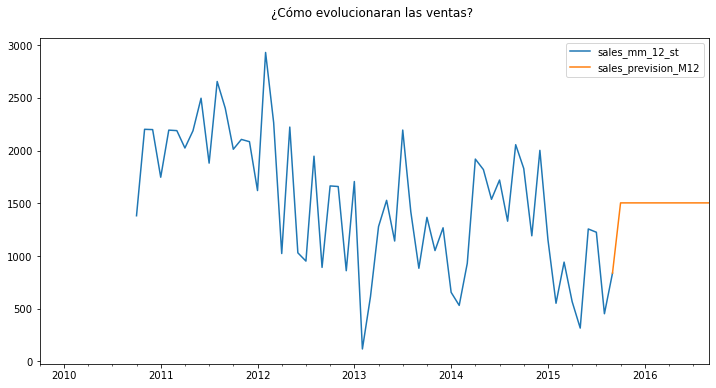

In [16]:
## Representamos nuestra previsión
df_sales.loc[:,['sales_mm_12_st','sales_prevision_M12']].plot(figsize=(12,6),
                  title='¿Cómo evolucionaran las ventas? \n')

#### *P: Esta previsión, ¿qué significa? ¿cómo lo puedo convertir en un número que se parezca a mis alquileres?*

* Hemos realizado una prevision al año siguiente partiendo del último daro del residuo, es decir del último dato que teniamos sin tendencia y sin estacionalidad.

* Los siguientes pasos para poder tener un dato similar al de los alquileres es ir incorporando los componentes de tendencia y estacionalidad.

### 4.3.-  Incorporar las componentes de la serie: estacionalidad y tendencia

#### a) Incorpora la tendencia a la previsión de alquileres y representa los resultados.

In [17]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan 
df_sales['sales_prevision_M12_ct']=np.nan
## Toma la variación de la serie sin estacionalidad
df_sales['sales_prevision_M12_ct'][-13] = df_sales['sales_mm_12'][-13] # Último dato con tendencia
df_sales.tail(15)


,sales,sales_mm_12,sales_mm_12_st,sales_prevision_M12,sales_prevision_M12_ct
2015-07-01,457710.0,440308.000000,1225.416667,NaN,NaN
2015-08-01,456340.0,440760.250000,452.250000,NaN,NaN
2015-09-01,430917.0,441597.416667,837.166667,837.166667,441597.416667
2015-10-01,NaN,NaN,NaN,1503.863889,NaN
2015-11-01,NaN,NaN,NaN,1503.863889,NaN
2015-12-01,NaN,NaN,NaN,1503.863889,NaN
2016-01-01,NaN,NaN,NaN,1503.863889,NaN
2016-02-01,NaN,NaN,NaN,1503.863889,NaN
2016-03-01,NaN,NaN,NaN,1503.863889,NaN
2016-04-01,NaN,NaN,NaN,1503.863889,NaN


In [18]:
#Sumamos el acumulado sin tendencia mes a mes al último valor con tendencia que teniamos registrado
df_sales['sales_prevision_M12_ct'][-12:] = df_sales['sales_prevision_M12'][-12:].cumsum()\
                                       + df_sales['sales_mm_12'][-13]
df_sales.tail(15)


,sales,sales_mm_12,sales_mm_12_st,sales_prevision_M12,sales_prevision_M12_ct
2015-07-01,457710.0,440308.000000,1225.416667,NaN,NaN
2015-08-01,456340.0,440760.250000,452.250000,NaN,NaN
2015-09-01,430917.0,441597.416667,837.166667,837.166667,441597.416667
2015-10-01,NaN,NaN,NaN,1503.863889,443101.280556
2015-11-01,NaN,NaN,NaN,1503.863889,444605.144444
2015-12-01,NaN,NaN,NaN,1503.863889,446109.008333
2016-01-01,NaN,NaN,NaN,1503.863889,447612.872222
2016-02-01,NaN,NaN,NaN,1503.863889,449116.736111
2016-03-01,NaN,NaN,NaN,1503.863889,450620.600000
2016-04-01,NaN,NaN,NaN,1503.863889,452124.463889


<AxesSubplot:title={'center':'¿Cómo evolucionaran las ventas por mes el siguiente año? \n'}>

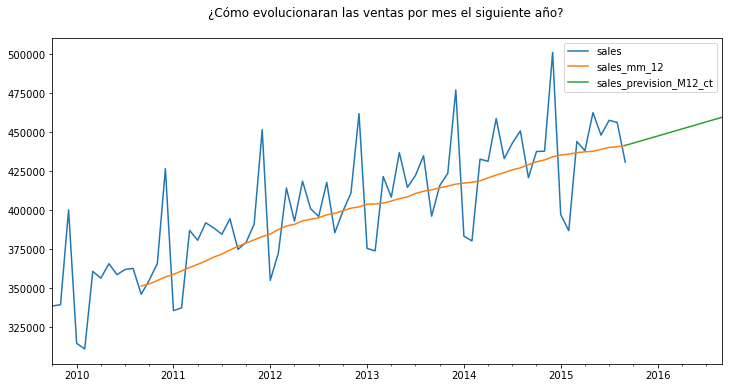

In [19]:
## Representamos nuestra previsión
df_sales.loc[:,['sales','sales_mm_12','sales_prevision_M12_ct']].plot(figsize=(12,6),
                  title='¿Cómo evolucionaran las ventas por mes el siguiente año? \n')


#### b) Incorpora la estacionalidad a la previsión de alquileres y representa los resultados.

Una forma sencilla sería calcular los coeficientes de estacionalidad vs la serie de media móvil y aplicar los últimos coeficientes ( o una media, ...) a mis previsiones para incorporar la estacionalidad.

In [20]:
## Calculamos los coeficientes de estacionalidad
df_sales['coef_estac']= df_sales['sales']/df_sales['sales_mm_12']
df_sales.tail(15)

,sales,sales_mm_12,sales_mm_12_st,sales_prevision_M12,sales_prevision_M12_ct,coef_estac
2015-07-01,457710.0,440308.000000,1225.416667,NaN,NaN,1.039522
2015-08-01,456340.0,440760.250000,452.250000,NaN,NaN,1.035347
2015-09-01,430917.0,441597.416667,837.166667,837.166667,441597.416667,0.975814
2015-10-01,NaN,NaN,NaN,1503.863889,443101.280556,NaN
2015-11-01,NaN,NaN,NaN,1503.863889,444605.144444,NaN
2015-12-01,NaN,NaN,NaN,1503.863889,446109.008333,NaN
2016-01-01,NaN,NaN,NaN,1503.863889,447612.872222,NaN
2016-02-01,NaN,NaN,NaN,1503.863889,449116.736111,NaN
2016-03-01,NaN,NaN,NaN,1503.863889,450620.600000,NaN
2016-04-01,NaN,NaN,NaN,1503.863889,452124.463889,NaN


In [21]:
df_sales['sales_prevision_M12_ct_cs'] = np.nan

In [22]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
## Como queremos la previsión para 4 trimestres, desplazamos esos coeficientes y los multiplicamos por 
## el valor de la previsión con tendencia
df_sales['sales_prevision_M12_ct_cs'] = df_sales['sales_prevision_M12_ct']  \
                                     * df_sales['coef_estac'].shift(12)
df_sales.tail(15)

,sales,sales_mm_12,sales_mm_12_st,sales_prevision_M12,sales_prevision_M12_ct,coef_estac,sales_prevision_M12_ct_cs
2015-07-01,457710.0,440308.000000,1225.416667,NaN,NaN,1.039522,NaN
2015-08-01,456340.0,440760.250000,452.250000,NaN,NaN,1.035347,NaN
2015-09-01,430917.0,441597.416667,837.166667,837.166667,441597.416667,0.975814,432956.044528
2015-10-01,NaN,NaN,NaN,1503.863889,443101.280556,NaN,449885.680478
2015-11-01,NaN,NaN,NaN,1503.863889,444605.144444,NaN,450382.209139
2015-12-01,NaN,NaN,NaN,1503.863889,446109.008333,NaN,514866.679685
2016-01-01,NaN,NaN,NaN,1503.863889,447612.872222,NaN,408348.326699
2016-02-01,NaN,NaN,NaN,1503.863889,449116.736111,NaN,398574.509333
2016-03-01,NaN,NaN,NaN,1503.863889,450620.600000,NaN,458011.686108
2016-04-01,NaN,NaN,NaN,1503.863889,452124.463889,NaN,452854.994067


<AxesSubplot:title={'center':'¿Cómo evolucionaran las ventas por mes el siguiente año? \n'}>

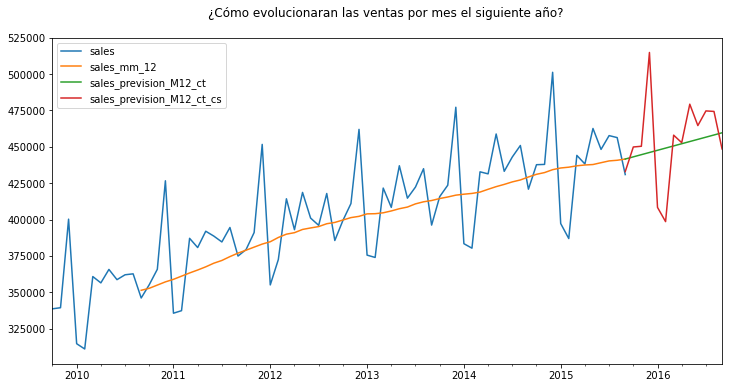

In [23]:
## Representamos nuestra previsión

df_sales.loc[:,['sales','sales_mm_12','sales_prevision_M12_ct','sales_prevision_M12_ct_cs']].plot(figsize=(12,6),
                  title='¿Cómo evolucionaran las ventas por mes el siguiente año? \n')
